## Algerian Forest Fires Dataset  

The **Algerian Forest Fires Dataset** from the **UCI Machine Learning Repository** contains meteorological and fire-related data collected from two different regions in Algeria. It is designed for **fire prediction** and **environmental monitoring**.  

### 📌 Dataset Overview  

- The dataset consists of **244 instances** and **13 attributes**.  
- It is divided into **two regions**:  
  - **Bejaia Region** (1st region)  
  - **Sidi Bel-abbes Region** (2nd region)  
- Includes **meteorological variables** and **fire-related attributes**.  

### 🔹 Attributes  

| Attribute                  | Description |
|----------------------------|-------------|
| **Date**                   | The date of observation. |
| **Temperature (°C)**        | Daily average temperature. |
| **RH (%)**                 | Relative humidity. |
| **Ws (km/h)**              | Wind speed. |
| **Rain (mm)**              | Total daily rainfall. |
| **Fine Fuel Moisture Code (FFMC)** | A fire risk indicator measuring the moisture content of surface fuels. |
| **Duff Moisture Code (DMC)** | Represents moisture content in medium-size forest fuels. |
| **Drought Code (DC)**       | Reflects long-term moisture deficit. |
| **Initial Spread Index (ISI)** | An indicator of fire spread potential. |
| **Buildup Index (BUI)**     | Represents the total fuel availability for burning. |
| **Fire Weather Index (FWI)** | A comprehensive fire risk indicator. |
| **Classes**                | Whether a fire occurred (**fire**) or not (**not fire**). |

### 🔥 Applications  

✅ **Fire Prediction** → Helps in modeling fire outbreaks based on meteorological conditions.  
✅ **Environmental Studies** → Useful for climate research and fire prevention strategies.  
✅ **Machine Learning** → Suitable for classification and regression tasks related to fire risk.  

---

 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' ,header = 1)     #header  = 1 to remove the top row
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## Data Cleaning

In [5]:
## missing value
df[df.isnull().any(axis = 1)]  ## display missing rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


After index 122 we can see the dataset is divided into second region called sidi-Bel Abbis Region,we can make a new column based on the region 
1. "Bejaia Region"
2. "Sidi Bel-Abbis Region"

Add new column with region


In [6]:
df.loc[:122 , "Region"] = 0
df.loc[123: , "Region"] = 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


Converting float of region to int type

In [8]:
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

## Remove Null value

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df = df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

## Fix space in column name

In [17]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Change the data types for the columns as required

In [18]:
df[['month','year','Temperature','RH','Ws','day']] = df[['month','year','Temperature','RH','Ws','day']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


### Changing the other to float data type

In [20]:
[features for features in df.columns if df[features].dtypes == 'O']

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
data_types  = [features for features in df.columns if df[features].dtypes == 'O']

In [22]:
for i in data_types:
    if(i != 'Classes'):
        df[i] = df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [24]:
## Saving the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv')

## Exploratory Data Analysis

In [25]:
df_copy = df.drop(['day' , 'month' , 'year'] , axis = 1)

In [26]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [27]:

# Convert the column to lowercase and strip spaces (to avoid case/spelling issues)
df_copy['Classes'] = df_copy['Classes'].str.strip().str.lower()

# Apply encoding: 'fire' → 1, 'not fire' → 0
df_copy['Classes'] = np.where(df_copy['Classes'] == 'fire', 1, 0)

print(df_copy['Classes'].value_counts())


Classes
1    137
0    106
Name: count, dtype: int64


In [28]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [29]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

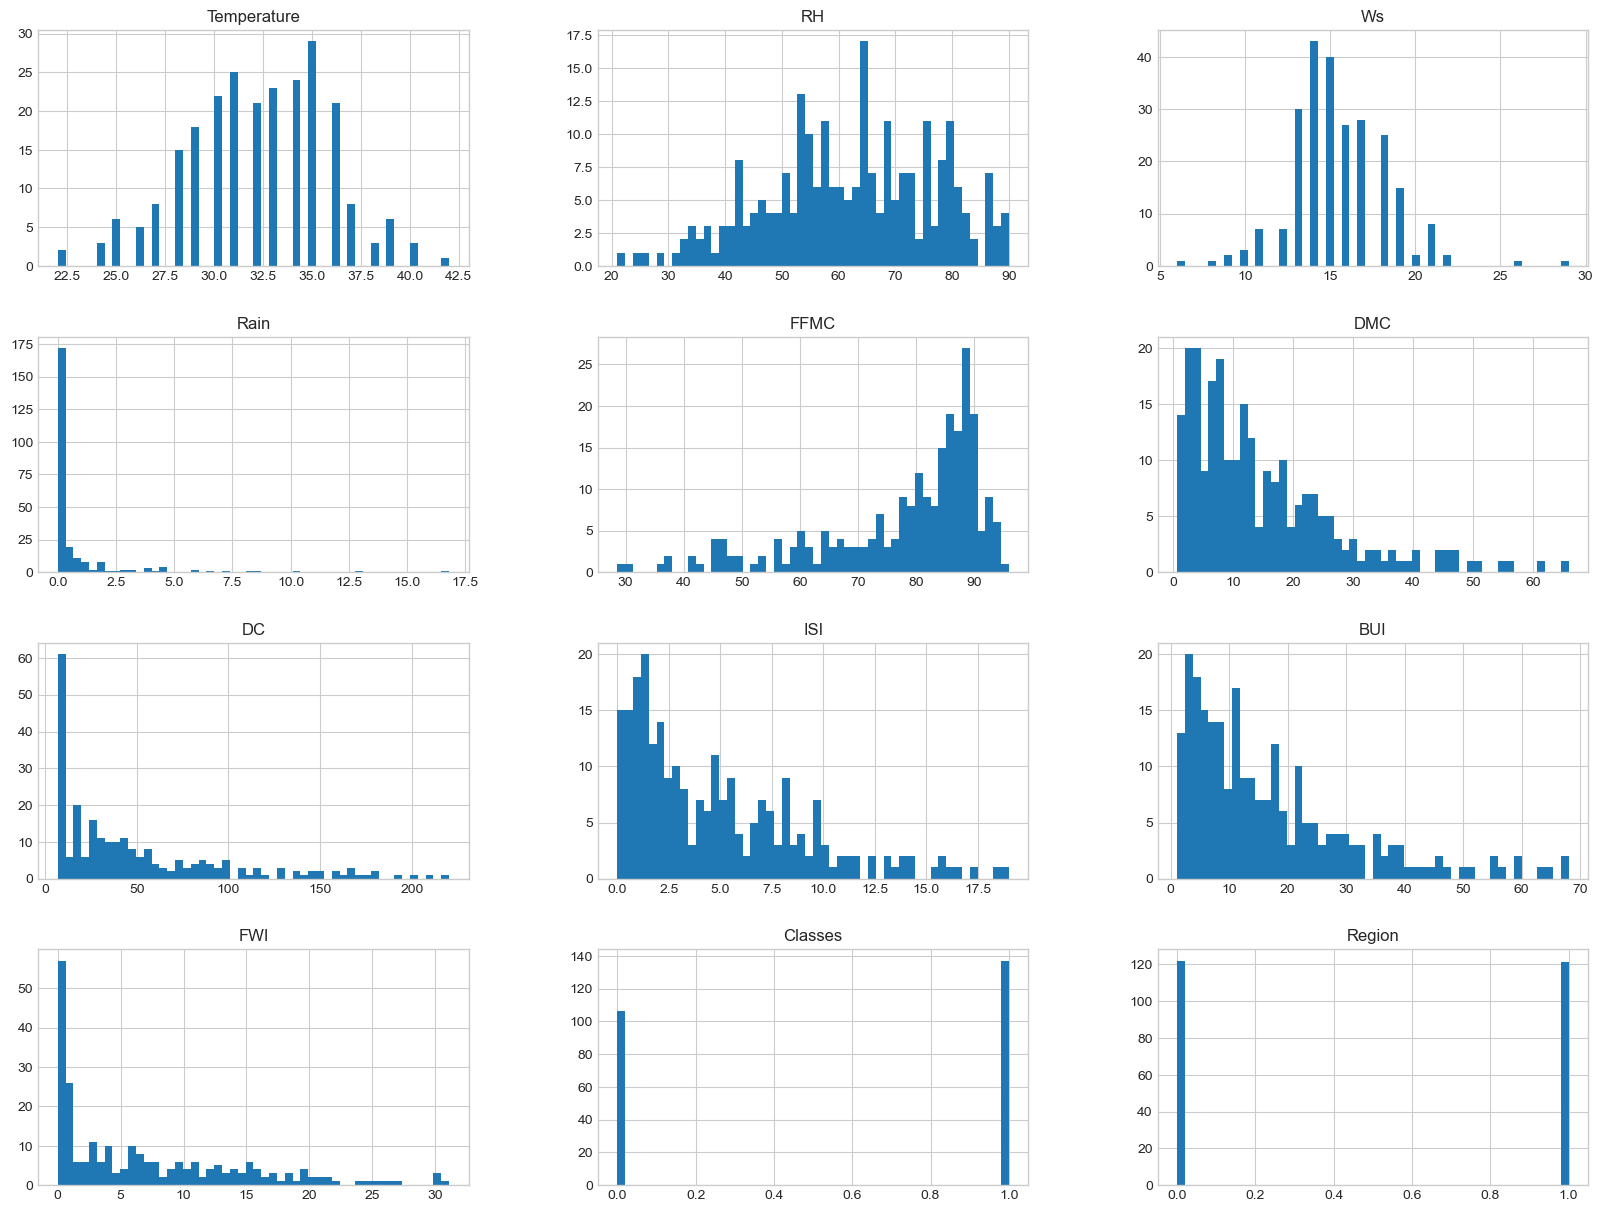

In [31]:
## Plot density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [32]:
## Percentage for pie chart
percentage  = df_copy['Classes'].value_counts(normalize = True)*100

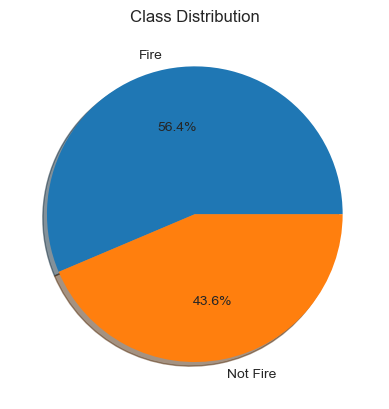

In [33]:
classlabels = ['Fire' , 'Not Fire']
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%',shadow=True)
plt.title('Class Distribution')
plt.show()

In [34]:
## Correlation 

In [35]:
corr = df_copy.corr()

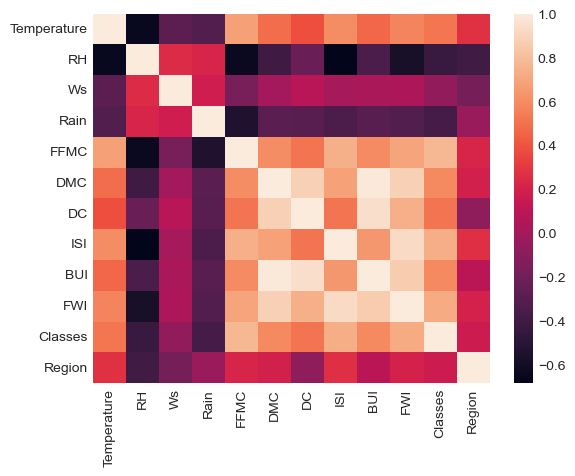

In [36]:
sns.heatmap(corr)
plt.show()

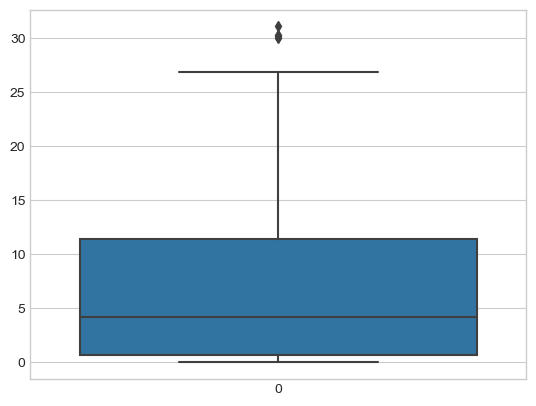

In [37]:
sns.boxplot(df['FWI'])
plt.show()

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
## Monthly fire analysis

In [40]:

# Convert the column to lowercase and strip spaces (to avoid case/spelling issues)
df['Classes'] = df['Classes'].str.strip().str.lower()

# Apply encoding: 'fire' → 1, 'not fire' → 0
df['Classes'] = np.where(df['Classes'] == 'fire', 'fire', 'not fire')

print(df['Classes'].value_counts())


Classes
fire        137
not fire    106
Name: count, dtype: int64


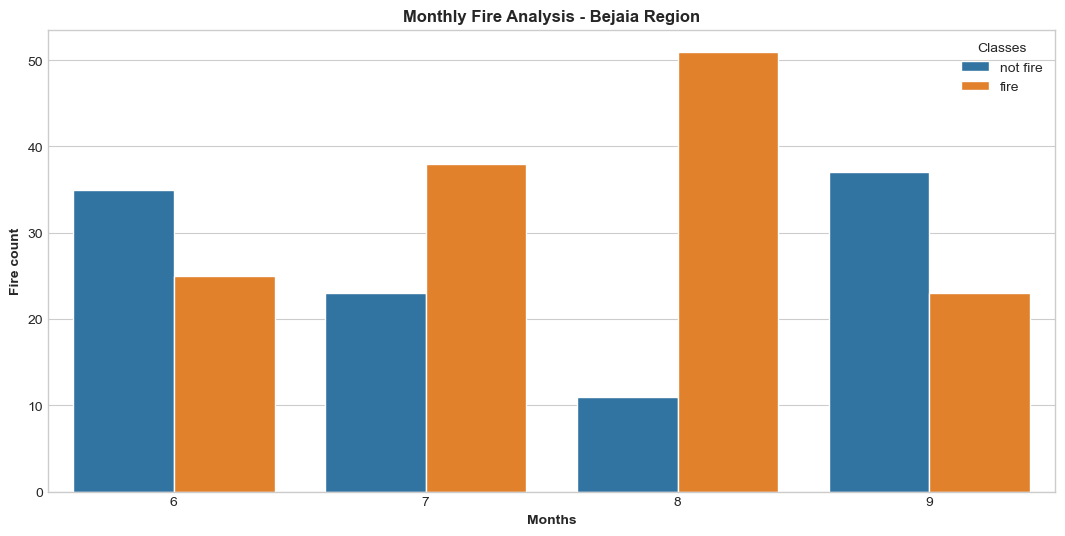

In [41]:
dftemp  = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")
sns.countplot(x='month', data=df, hue='Classes')
plt.xlabel('Months' ,weight='bold')
plt.ylabel('Fire count' , weight='bold')
plt.title('Monthly Fire Analysis - Bejaia Region' , weight='bold')
plt.show()

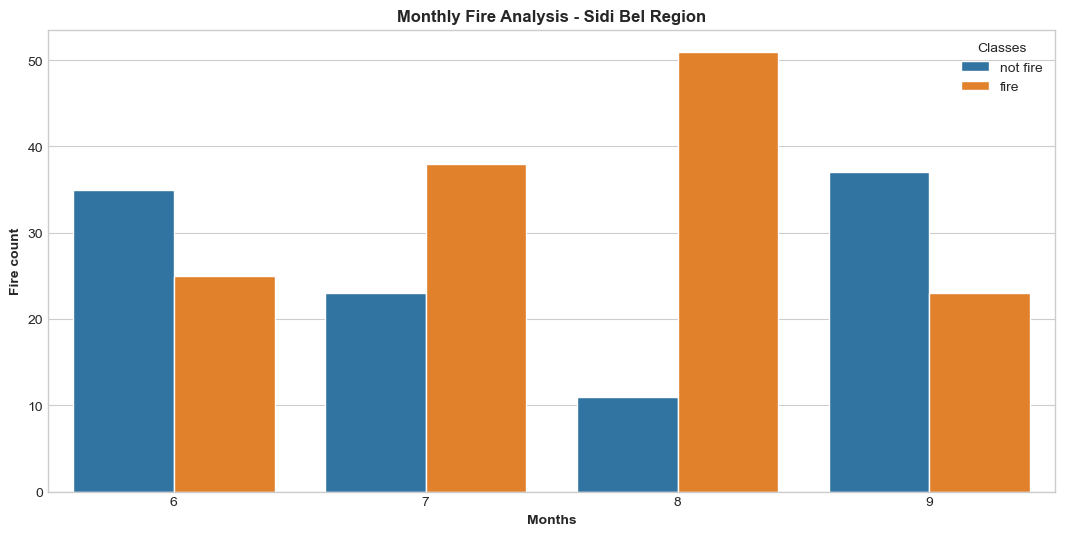

In [42]:
dftemp  = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")
sns.countplot(x='month', data=df, hue='Classes')
plt.xlabel('Months' ,weight='bold')
plt.ylabel('Fire count' , weight='bold')
plt.title('Monthly Fire Analysis - Sidi Bel Region' , weight='bold')
plt.show()

### We can interpret from the given graph that most number of Fire broke out in the month of August
### Relatively Less fires were there in the month of sepetember
### Most fires broke out in the month of july and august

## Model Training

In [43]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')

In [44]:
df = df.drop(['month','day','year'],axis = 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    object 
 12  Region       243 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 24.8+ KB


In [46]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [47]:
# Convert the column to lowercase and strip spaces (to avoid case/spelling issues)
df['Classes'] = df['Classes'].str.strip().str.lower()

# Apply encoding: 'fire' → 1, 'not fire' → 0
df['Classes'] = np.where(df['Classes'] == 'fire', 1, 0)

# Verify changes
print(df['Classes'].value_counts())

Classes
1    137
0    106
Name: count, dtype: int64


In [48]:
X = df.drop('FWI' , axis = 1)
y = df['FWI']

In [49]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [50]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [52]:
X_train.shape  , X_test.shape

((182, 11), (61, 11))

In [53]:
## feature selection

In [54]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

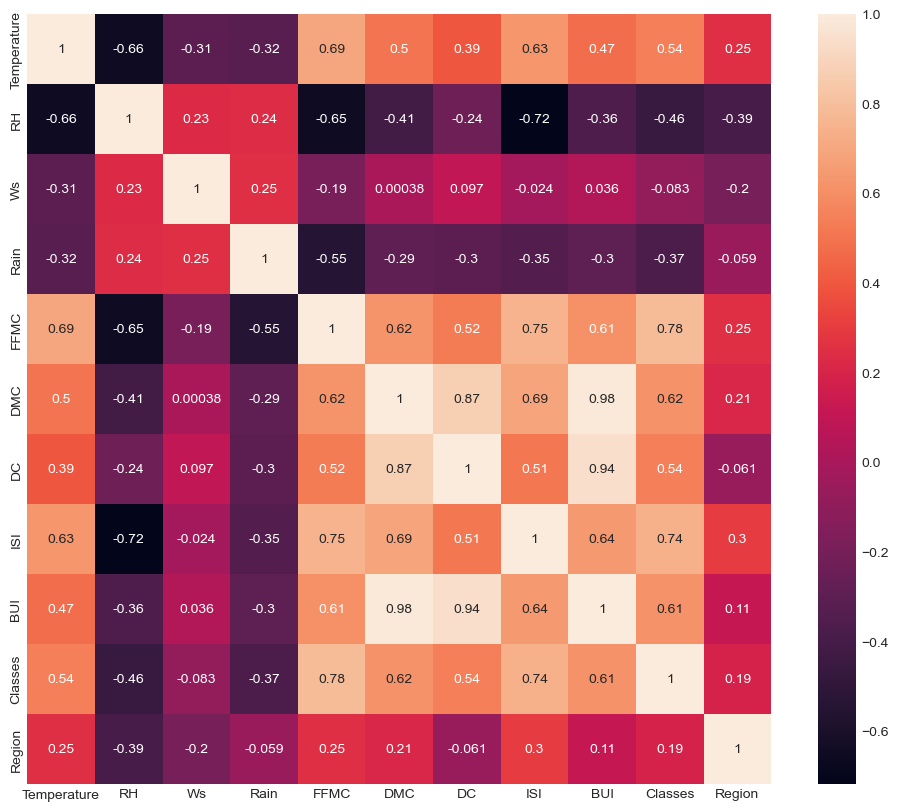

In [55]:
## Checking for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr , annot = True)

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train,0.85)

In [58]:
## drop the features when corr is more than 0.85

In [59]:
X_train.drop(corr_features , axis  = 1 , inplace = True)

In [60]:
X_test.drop(corr_features , axis = 1 , inplace = True)

In [61]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [62]:
## Features scaling and scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [67]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Boxplot to understand the effect of scaler / standardization

C:\Users\deeps\AppData\Local\Temp\ipykernel_44128\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

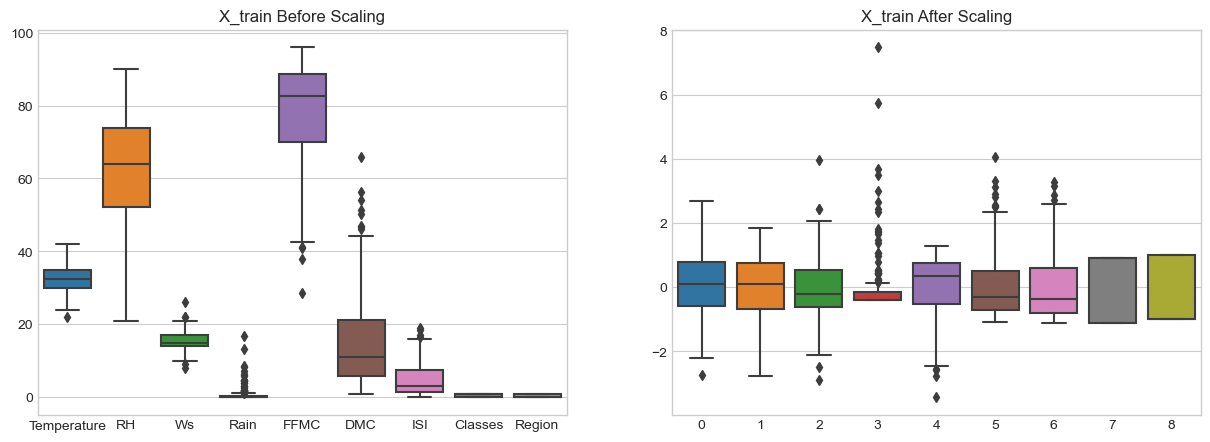

In [68]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

In [70]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

Mean Absolute Error: 0.5468236465249993
R2 Score: 0.9847657384266951


### Why Use This Plot?

This plot helps evaluate how well the model's predictions match the actual values:

    Perfect Model: If the model is perfect, all points should lie on a 45-degree diagonal line (i.e., y_test = y_pred).
    Underfitting/Overfitting: If the points are widely scattered, it may indicate poor model performance.
    Bias/Variance Issues: A pattern in the scatter might indicate systematic errors or variance issues.

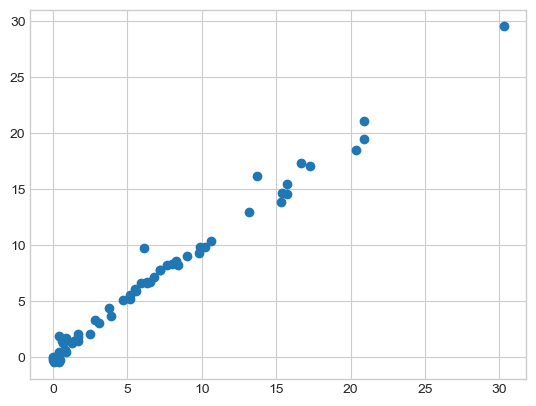

In [71]:
plt.scatter(y_test, y_pred)     #if in the plot the scatter points are at 45 degree line then the model is good 

## Lasso Regression

In [72]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)

y_pred = lasso_reg.predict(X_test_scaled)

In [73]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

Mean Absolute Error: 1.1331759949144085
R2 Score: 0.9492020263112388


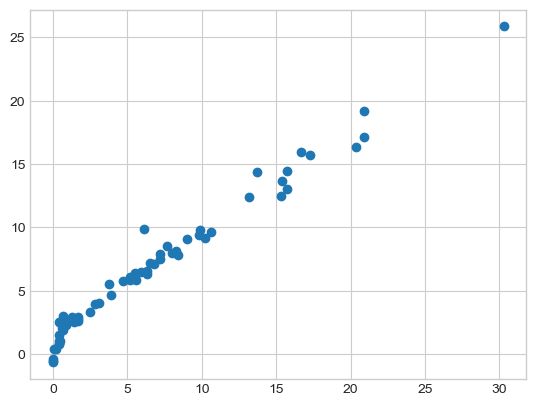

In [74]:
plt.scatter(y_test, y_pred)     #if in the plot the scatter points are at 45 degree line then the model is good 

## Cross Validation

In [75]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv = 5)
lassoCV.fit(X_train_scaled , y_train)

LassoCV(cv=5)

In [76]:
lassoCV.alpha_

0.05725391318234408

In [77]:
lassoCV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [78]:
lassoCV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

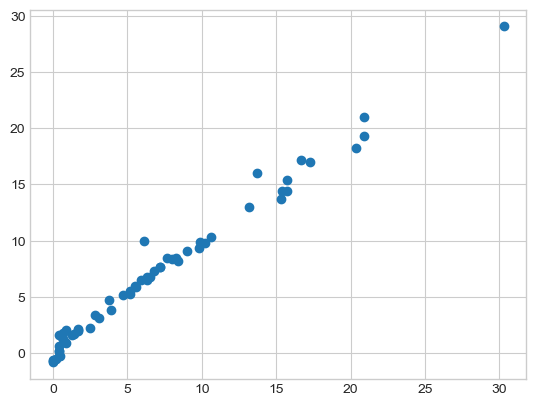

In [79]:
y_pred = lassoCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

## Ridge regression model

In [80]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)

y_pred = ridge_reg.predict(X_test_scaled)

In [81]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

Mean Absolute Error: 0.5642305340105717
R2 Score: 0.9842993364555513


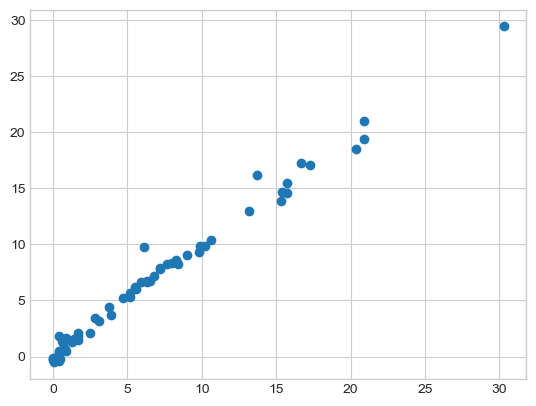

In [82]:
plt.scatter(y_test, y_pred)     #if in the plot the scatter points are at 45 degree line then the model is good 

Mean Absolute Error: 0.5642305340105717
R2 Score: 0.9842993364555513


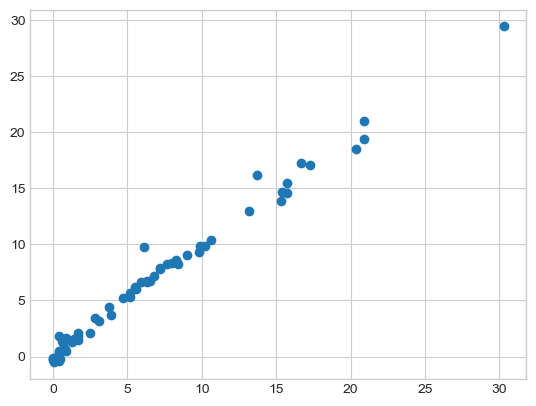

In [83]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv = 5)
ridgeCV.fit(X_train_scaled , y_train)
y_pred = ridgeCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

In [84]:
ridgeCV.alphas

(0.1, 1.0, 10.0)

In [85]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression Model

In [86]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic_reg = ElasticNet()
elastic_reg.fit(X_train_scaled, y_train)

y_pred = elastic_reg.predict(X_test_scaled)

In [87]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


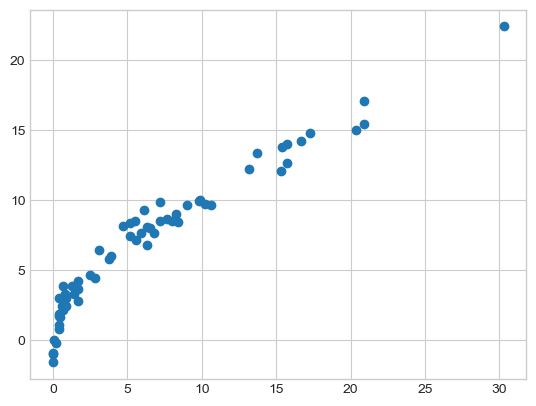

In [88]:
plt.scatter(y_test, y_pred)     #if in the plot the scatter points are at 45 degree line then the model is good 

Mean Absolute Error: 0.6575946731430905
R2 Score: 0.9814217587854941


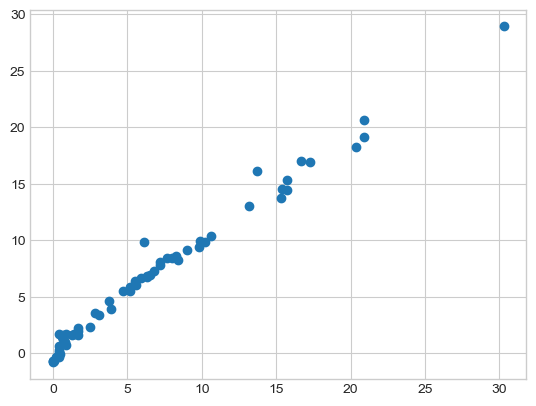

In [89]:
from sklearn.linear_model import ElasticNetCV
elasticCV = ElasticNetCV(cv = 5)
elasticCV.fit(X_train_scaled , y_train)
y_pred = elasticCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)

In [90]:
elasticCV.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

## Pickle the machine learning models , preprocessing model and standard scaler

In [91]:
scaler

StandardScaler()

In [92]:
ridge_reg   ## since it had best performance

Ridge()

In [93]:
import pickle 
pickle.dump(scaler , open('scaler.pkl','wb'))

In [94]:
pickle.dump(ridge_reg , open('ridge_reg.pkl','wb'))